In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
df=pd.read_csv('Student Mental health.csv')

In [3]:
df.drop(columns=['Timestamp'],inplace=True)

In [4]:
# Mapping dictionary for column renaming
new_column_names = {
    'Choose your gender': 'Gender',
    'Age': 'Age',
    'What is your course?': 'Major',
    'Your current year of Study': 'Year',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'Marital Status',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'Panic Attack',
    'Did you seek any specialist for a treatment?': 'Specialist Treatment'
}

# Renaming columns
df = df.rename(columns=new_column_names)


In [5]:
for col in df.columns : 
    print(col,df[col].unique())

Gender ['Female' 'Male']
Age [18. 21. 19. 22. 23. 20. 24. nan]
Major ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Year ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
CGPA ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Marital Status ['No' 'Yes']
Depression ['Yes' 'No']
Anxiety ['No' 'Yes']
Panic Attack ['Yes' 'No']
Specialist Treatment ['No' 'Yes']


In [6]:
columns_to_encode=df.columns
# Initializing a new LabelEncoder for each column
label_encoders = {}

# Encoding categorical columns
for col in columns_to_encode:
    if col in df.columns:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col].astype(str))
        label_encoders[col] = label_encoder  # Store the LabelEncoder for each column

# Retrieving the encoded values for each category
encoded_values = {}
for col, encoder in label_encoders.items():
    encoded_values[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print the encoded values for each column
for col, values in encoded_values.items():
    print(f"Column: {col}")
    print(values)

    

Column: Gender
{'Female': 0, 'Male': 1}
Column: Age
{'18.0': 0, '19.0': 1, '20.0': 2, '21.0': 3, '22.0': 4, '23.0': 5, '24.0': 6, 'nan': 7}
Column: Major
{'ALA': 0, 'Accounting ': 1, 'BCS': 2, 'BENL': 3, 'BIT': 4, 'Banking Studies': 5, 'Benl': 6, 'Biomedical science': 7, 'Biotechnology': 8, 'Business Administration': 9, 'CTS': 10, 'Communication ': 11, 'DIPLOMA TESL': 12, 'Diploma Nursing': 13, 'ENM': 14, 'Econs': 15, 'Engine': 16, 'Engineering': 17, 'Fiqh': 18, 'Fiqh fatwa ': 19, 'Human Resources': 20, 'Human Sciences ': 21, 'IT': 22, 'Irkhs': 23, 'Islamic Education': 24, 'Islamic education': 25, 'KENMS': 26, 'KIRKHS': 27, 'KOE': 28, 'Kirkhs': 29, 'Koe': 30, 'Kop': 31, 'Law': 32, 'Laws': 33, 'MHSC': 34, 'Malcom': 35, 'Marine science': 36, 'Mathemathics': 37, 'Nursing ': 38, 'Pendidikan Islam': 39, 'Pendidikan Islam ': 40, 'Pendidikan islam': 41, 'Psychology': 42, 'Radiography': 43, 'TAASL': 44, 'Usuluddin ': 45, 'engin': 46, 'koe': 47, 'psychology': 48}
Column: Year
{'Year 1': 0, 'Yea

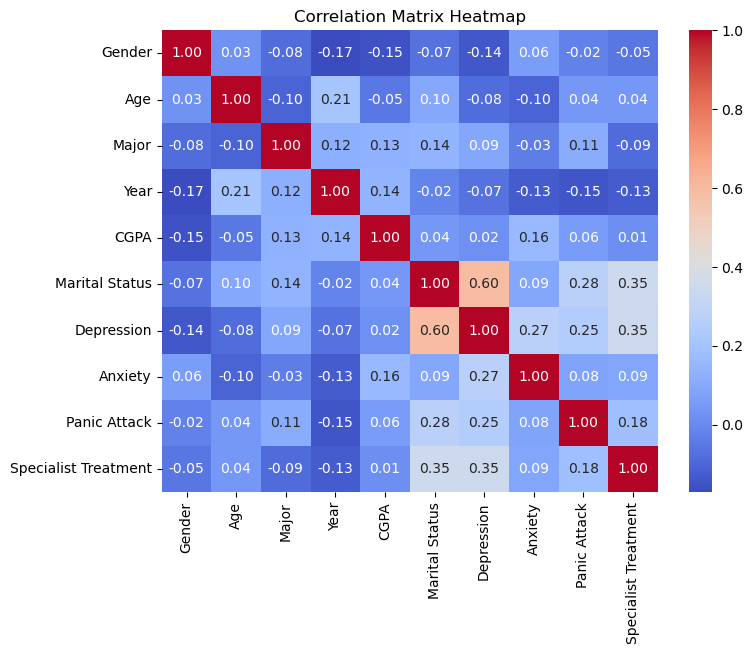

In [7]:
corr_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [8]:
# Features and target variable
X = df.drop('Specialist Treatment', axis=1)
y = df['Specialist Treatment']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifier
model = RandomForestClassifier()  # Replace DecisionTreeClassifier with RandomForestClassifier
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19  0]
 [ 2  0]]


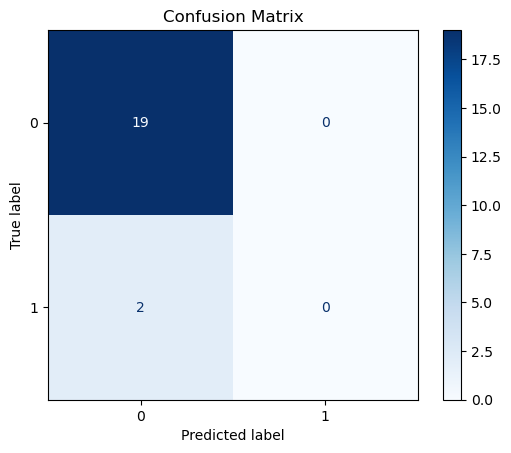

In [10]:
# ploting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')  # You can adjust the color map as needed
plt.title('Confusion Matrix')
plt.show()


In [11]:
import numpy as np

#list of 11 features
features = [0, 0, 17, 3, 3, 0, 0, 1, 0]


# Convert to numpy array and reshape
selected_array = np.array(features).reshape(1, -1)

# Now you can use the selected and reshaped array for prediction
model.predict(selected_array)


C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])